In [4]:
from matplotlib import pyplot as plt
import cv2
import csv #to import PI data
#import custom support functions
from cv_support import *

In [5]:
#function to find ROI in an image
def findROI(frame, trgt, name):
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(trgt, 0)
    w, h = template.shape[::-1]
    method = cv2.TM_CCORR_NORMED

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc

    roi = Roi(name,top_left[0], top_left[1], w, h)
    
    return img, roi 

#function to save the ROI to CSV
def saveROI(rois):

    filename = "roi_coords_auto.csv"
    fields = ["name","from_left","from_top","width","height"]
    rows = []
    
    for roi in rois:
        rows.append([roi.name, roi.left, roi.top, roi.width, roi.height])
                     
    with open(filename, "w") as csvfile: #ab = overwrite
    
        # create csv writer object
        csvwriter = csv.writer(csvfile)

        # write the headers
        csvwriter.writerow(fields)
        
        # write the rows
        csvwriter.writerows(rows)
    
    print("ROI Coordinates saved to: " + filename)
    
    return


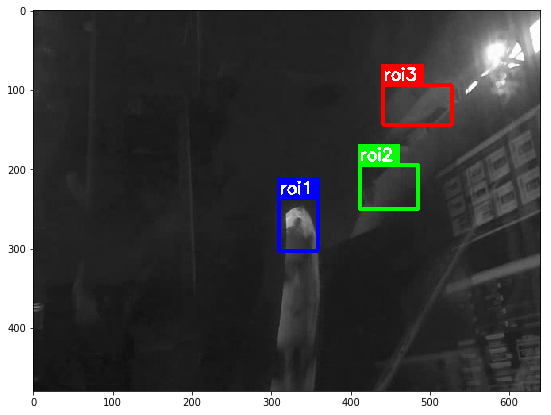

ROI Coordinates saved to: roi_coords_auto.csv


In [6]:
#existing capture
cap = cv2.VideoCapture('DATA/PICAM 20210406 122702.avi')

#new capture
#cap = cv2.VideoCapture(gstreamer_pipeline(flip_method=0), cv2.CAP_GSTREAMER)


if cap.isOpened() == False:
    print("Error: file not found!")

x = 0
frame_target = 10

while(cap.isOpened() and x < frame_target + 1):
    
    ret, frame = cap.read()
    
    #print ROI
    if (x == 10):
        
        #FIND THE ROIS
        img, roi1 = findROI(frame,"images/trgt1.jpg","roi1")
        img, roi2 = findROI(frame,"images/trgt2.jpg","roi2")
        img, roi3 = findROI(frame,"images/trgt3.jpg","roi3")
        
        #DRAW THE ROIs
        col = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        col = drawROI(col, roi1, (0,0,255))
        col = drawROI(col, roi2, (0,255,0))
        col = drawROI(col, roi3, (255,0,0))
        plt.figure(figsize=(11, 7))
        plt.imshow(col,cmap='gray')
        plt.show()
   
        #SAVE THE ROIS
        lstROI = []
    
        lstROI.append(roi1)
        lstROI.append(roi2)
        lstROI.append(roi3)
        saveROI(lstROI)
        
    #increment frame counter
    x = x + 1
    
cap.release()
cv2.destroyAllWindows()